# 1 - Rule based sentiment analysis

In [1]:
from textblob import TextBlob

## TextBlob

Built on top of NLTK & Pattern libraries.

Uses a bag-of-words + machine learning + lexicon-based approach.
Sentiment is derived from a polarity lexicon and simple NLP preprocessing.

Output:
Two values: polarity (–1 to +1) and subjectivity (0 to 1).

In [2]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [3]:
print(sentence_1)
sentiment_score = TextBlob(sentence_1)
print(sentiment_score.sentiment.polarity)

i had a great time at the movie it was really funny
0.525


TextBlob returns a score between -1 and 1, where negative scores indicate negative sentiment, and positive scores indicate positive sentiment.

In [4]:
print(sentence_2)
sentiment_score = TextBlob(sentence_2)
print(sentiment_score.sentiment.polarity)

i had a great time at the movie but the parking was terrible
-0.09999999999999998


In [5]:
print(sentence_3)
sentiment_score = TextBlob(sentence_3)
print(sentiment_score.sentiment.polarity)

i had a great time at the movie but the parking wasn't great
0.8


In [6]:
print(sentence_4)
sentiment_score = TextBlob(sentence_4)
print(sentiment_score.sentiment.polarity)

i went to see a movie
0.0


## Vader

VADER (Valence Aware Dictionary and sEntiment Reasoner)

Designed for social media / short texts (tweets, reviews, comments).

Lexicon + rule-based model:
Comes with a predefined dictionary of words → each word has an intensity score.
Also accounts for punctuation, capitalization, degree modifiers (very good, !!!, NOT good).

Output:
Returns 4 scores: pos, neu, neg, and compound (a normalized overall sentiment).

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
vader_sentiment = SentimentIntensityAnalyzer()

In [10]:
print(sentence_1)
print(vader_sentiment.polarity_scores(sentence_1))

i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


In [11]:
print(sentence_2)
print(vader_sentiment.polarity_scores(sentence_2))

i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}


In [12]:
print(sentence_3)
print(vader_sentiment.polarity_scores(sentence_3))

i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}


In [13]:
print(sentence_4)
print(vader_sentiment.polarity_scores(sentence_4))

i went to see a movie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Pre-trained transformers

In [14]:
import transformers
from transformers import pipeline

In [15]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use mps:0


In [16]:
print(sentence_1)
print(sentiment_pipeline(sentence_1))

i had a great time at the movie it was really funny
[{'label': 'POSITIVE', 'score': 0.9998176693916321}]


In [17]:
print(sentence_2)
print(sentiment_pipeline(sentence_2))

i had a great time at the movie but the parking was terrible
[{'label': 'NEGATIVE', 'score': 0.9977464079856873}]


In [18]:
print(sentence_3)
print(sentiment_pipeline(sentence_3))

i had a great time at the movie but the parking wasn't great
[{'label': 'NEGATIVE', 'score': 0.9984902143478394}]


In [19]:
print(sentence_4)
print(sentiment_pipeline(sentence_4))

i went to see a movie
[{'label': 'POSITIVE', 'score': 0.9802700281143188}]


The default model isn't giving us great results for our neutral sentence. However there are loads of models we can choose to use that have been trained on different data with different parameters: https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

Let's try a specific model trained on tweets in the English language only and see if that improves our results.

In [20]:
specific_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [21]:
print(sentence_1)
specific_model(sentence_1)

i had a great time at the movie it was really funny


[{'label': 'POS', 'score': 0.9923344254493713}]

In [22]:
print(sentence_2)
specific_model(sentence_2)

i had a great time at the movie but the parking was terrible


[{'label': 'NEG', 'score': 0.5355544686317444}]

In [23]:
print(sentence_3)
specific_model(sentence_3)

i had a great time at the movie but the parking wasn't great


[{'label': 'POS', 'score': 0.6234409213066101}]

In [24]:
print(sentence_4)
specific_model(sentence_4)

i went to see a movie


[{'label': 'NEU', 'score': 0.9007406830787659}]

# Practical

In [25]:
import pandas as pd
import numpy as np
import re
# import vadersentiment, it's already imported at the top
# import transforemers, it's already imported

In [26]:
data = pd.read_csv('assets/book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [28]:
# lowercase
data['reviewText_clean'] = data['reviewText'].str.lower()

In [29]:
# remove punctuation
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['reviewText_clean']), axis=1)

## Rule-based sentiment with VADER

In [30]:
vader_sentiment = SentimentIntensityAnalyzer()

In [32]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])
data

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767
...,...,...,...,...,...
95,1794,Love this author. I have read most of her book...,5,love this author i have read most of her books...,0.7549
96,6716,This book was not bad! I like the storyline ! ...,2,this book was not bad i like the storyline th...,0.1877
97,7372,This is part of a series I read and I loved th...,5,this is part of a series i read and i loved th...,0.5994
98,5676,Finally a Texas newspaper in Kindle format.Way...,4,finally a texas newspaper in kindle formatway ...,0.1779


In [34]:
bins = [-1,-0.1, 0.1,1] # -1 to -0.1 and 0.1 to 1
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

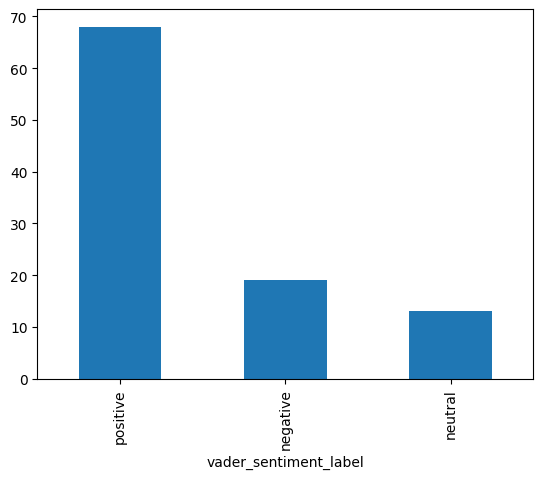

In [36]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [63]:
transformer_pipeline = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [64]:
transformer_labels = []
for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

In [65]:
data['transformer_sentiment_label'] = transformer_labels

In [67]:
data['transformer_sentiment_label'].value_counts()

transformer_sentiment_label
[POS]    57
[NEG]    32
[NEU]    11
Name: count, dtype: int64

<Axes: xlabel='transformer_sentiment_label'>

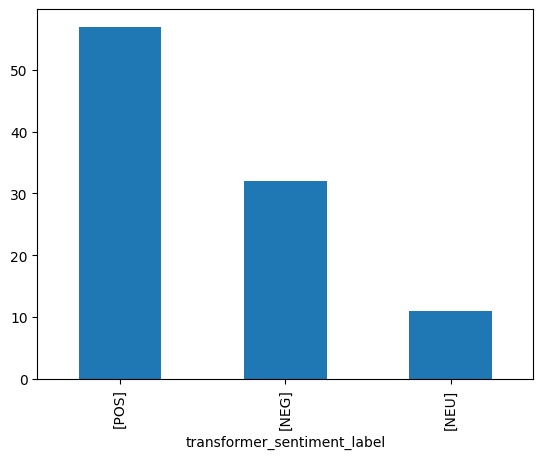

In [66]:
data['transformer_sentiment_label'].value_counts().plot.bar()

In [68]:
data

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_label,transformer_sentiment_score,transformer_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,0.964309,[POS]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,0.992297,[POS]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,0.772695,[NEG]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,0.844692,[NEG]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,0.983339,[NEG]
...,...,...,...,...,...,...,...,...
95,1794,Love this author. I have read most of her book...,5,love this author i have read most of her books...,0.7549,positive,0.992738,[POS]
96,6716,This book was not bad! I like the storyline ! ...,2,this book was not bad i like the storyline th...,0.1877,positive,0.803788,[POS]
97,7372,This is part of a series I read and I loved th...,5,this is part of a series i read and i loved th...,0.5994,positive,0.992831,[POS]
98,5676,Finally a Texas newspaper in Kindle format.Way...,4,finally a texas newspaper in kindle formatway ...,0.1779,positive,0.925178,[POS]
